# General information about the datasets

In [1]:
# IMPORT

# Base libraries
import pandas as pd
import numpy as np

# JSON for loading of data
import json

# Plot
import matplotlib.pyplot as plt

# Random seed
RANDOM_SEED = 1234

## Load datasets

### Dataset: FEVER

In [2]:
# FEVER
# File paths
fever_test_path = "FEVER/test.jsonl"
fever_train_path = "FEVER/train.jsonl"


# Load test data 
with open(fever_test_path, 'r') as json_file:
    lines = json_file.read().splitlines()
fever_test = pd.DataFrame(lines)
fever_test.columns = ['json_element']
fever_test['json_element'].apply(json.loads)

fever_test = pd.json_normalize(fever_test['json_element'].apply(json.loads))


# Load train data
with open(fever_train_path, 'r') as json_file:
    lines = json_file.read().splitlines()
fever_train = pd.DataFrame(lines)
fever_train.columns = ['json_element']
fever_train['json_element'].apply(json.loads)

fever_train = pd.json_normalize(fever_train['json_element'].apply(json.loads))


# Merge the two datasets (test+train)
fever = pd.concat([fever_test, fever_train], axis=0, ignore_index=True)

Final dataset

In [3]:
# Remove the instances with the label 'NOT ENOUGH INFO'
fever_dopped = fever[fever['label'] != 'NOT ENOUGH INFO']


# Change the label encoding to 1 ('REFUTES', fake) and 0 ('SUPPORTS', real)
fever_dopped = fever_dopped.replace({'label':{'SUPPORTS': 1, 'REFUTES': 0}})


# Rename the 'label' column to 'is_real' (for easier understanding of the values)
fever_dopped.rename(columns={'label': 'is_real'}, inplace=True)

In [4]:
# Remove duplicates
fever_dopped  = fever_dopped.drop_duplicates(subset=('is_real', 'claim'))

In [5]:
# Sample 50000 instances
fever_sample = fever_dopped.sample(50000, axis='index', random_state=RANDOM_SEED)

In [6]:
# Remove unnecessary features from the dataset
fever_sample = fever_sample.drop(columns=['id', 'verifiable', 'evidence'])


# Rename the 'claim' column to 'text'
fever_sample.rename(columns={'claim': 'text'}, inplace=True)

### Dataset: Pheme

In [7]:
# File path
pheme_path = 'Pheme_dataset/dataset.csv'


# Load the dataaset
pheme_df = pd.read_csv(pheme_path)


# Remove unnecessary features from the dataset
pheme = pheme_df.drop(columns=['user.handle', 'topic'])

In [8]:
# Delete the null-valued rows from the dataset
pheme = pheme.dropna()

In [9]:
# Changing the data type of the "is_rumor" column from float to int
pheme['is_rumor'] = pheme['is_rumor'].astype(int)

In [10]:
# Flipping the label encoding (1 --> 0, 0 --> 1) and chaning the column name
pheme['is_rumor'] = pheme.loc[:, 'is_rumor'].replace({1: 0, 0: 1})
pheme.rename(columns={'is_rumor': 'is_real'}, inplace=True)

Final dataset

In [11]:
# Drop duplicates
pheme_final = pheme.drop_duplicates()

### GossipCop

In [12]:
# File paths
gossipcop_fake_path = 'GossipCop/gossipcop_fake.csv'
gossipcop_real_path = 'GossipCop/gossipcop_real.csv'


# Load the data
gossipcop_fake = pd.read_csv(gossipcop_fake_path)
gossipcop_real = pd.read_csv(gossipcop_real_path)


# Label the data
gossipcop_fake['is_real'] = 0
gossipcop_real['is_real'] = 1


# Merge the two datasets (fake+real)
gossipcop_df = pd.concat([gossipcop_fake, gossipcop_real], axis=0, ignore_index=True)


# Remove unnecessary features from the dataset
gossipcop_df.columns
gossipcop = gossipcop_df.drop(columns=['id', 'news_url', 'tweet_ids'])

In [13]:
# Rename the 'title' column to 'text'
gossipcop.rename(columns={'title': 'text'}, inplace=True)

Final dataset

In [14]:
# Remove duplicates
gossipcop_final = gossipcop.drop_duplicates()

## Descriptive stats about the datasets

### Original datasets

In [15]:
# Number of instances with label ('is_real') 0 and 1
print('Dataset: FEVER')
print('No. of instances: ', fever['claim'].count())
print('Label distribution:\n' + str(fever["label"].value_counts()))
print('\nDataset: Pheme')
print('No. of instances: ', pheme['text'].count())
print('Label distribution:\n' + str(pheme["is_real"].value_counts()))
print('\nDataset: GossipCop')
print('No. of instances: ', gossipcop['text'].count())
print('Label distribution:\n' + str(gossipcop["is_real"].value_counts()))

Dataset: FEVER
No. of instances:  165447
Label distribution:
SUPPORTS           86701
NOT ENOUGH INFO    42305
REFUTES            36441
Name: label, dtype: int64

Dataset: Pheme
No. of instances:  62443
Label distribution:
1    48619
0    13824
Name: is_real, dtype: int64

Dataset: GossipCop
No. of instances:  22140
Label distribution:
1    16817
0     5323
Name: is_real, dtype: int64


### Final datasets

In [16]:
# Number of instances with label ('is_real') 0 and 1
print('Dataset: FEVER')
print('No. of instances: ', fever_sample['text'].count())
print('Label distribution:\n' + str(fever_sample["is_real"].value_counts()))
print('\nDataset: Pheme')
print('No. of instances: ', pheme_final['text'].count())
print('Label distribution:\n' + str(pheme_final["is_real"].value_counts()))
print('\nDataset: GossipCop')
print('No. of instances: ', gossipcop_final['text'].count())
print('Label distribution:\n' + str(gossipcop_final["is_real"].value_counts()))

Dataset: FEVER
No. of instances:  50000
Label distribution:
1    34910
0    15090
Name: is_real, dtype: int64

Dataset: Pheme
No. of instances:  61404
Label distribution:
1    47875
0    13529
Name: is_real, dtype: int64

Dataset: GossipCop
No. of instances:  20863
Label distribution:
1    15967
0     4896
Name: is_real, dtype: int64


In [17]:
datasets = [fever_sample, pheme_final, gossipcop_final]
i = 0
stats_dict = {'Fake': [], 'Real': []}

for dataset in datasets:
    names = ['FEVER', 'Pheme', 'GossipCop']
    fake = dataset["is_real"].value_counts()[0]
    real = dataset["is_real"].value_counts()[1]
    total = dataset["is_real"].count()
    print(f'\nDataset: {names[i]}')
    print(f'Total number of instances: {total}')
    print(f'Number of fake news: {fake} ({fake / total * 100:.3f}%)')
    print(f'Number of real news: {real} ({real / total * 100:.3f}%)')

    stats_dict['Fake'].append(fake)
    stats_dict['Real'].append(real)

    i += 1


Dataset: FEVER
Total number of instances: 50000
Number of fake news: 15090 (30.180%)
Number of real news: 34910 (69.820%)

Dataset: Pheme
Total number of instances: 61404
Number of fake news: 13529 (22.033%)
Number of real news: 47875 (77.967%)

Dataset: GossipCop
Total number of instances: 20863
Number of fake news: 4896 (23.467%)
Number of real news: 15967 (76.533%)


### Plot

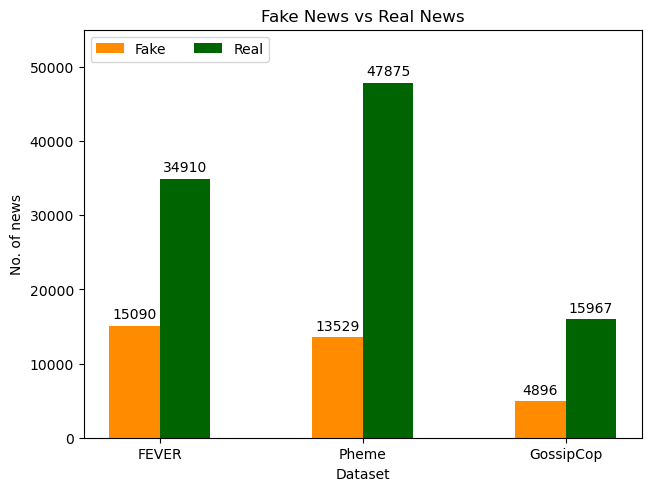

In [18]:
# Dataset names
names = ('FEVER', 'Pheme', 'GossipCop')

x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ['darkorange', 'darkgreen']

for attribute, measurement, color in zip(stats_dict.keys(), stats_dict.values(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of news')
ax.set_xlabel('Dataset')
ax.set_title('Fake News vs Real News')
ax.set_xticks(x + width/2, names)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 55000)

plt.show()